In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
X = pd.read_parquet('X.parquet')
Y = pd.read_parquet('Y.parquet')

In [67]:
# # Gerar dados de entrada (5 variáveis)
# num_samples = 100
# X = np.random.rand(num_samples, 5)  # Dados de entrada aleatórios no intervalo [0, 1]

# # Gerar dados de saída (2 variáveis)
# Y = np.column_stack((np.sum(X[:, :3], axis=1), np.mean(X[:, 3:], axis=1)))


X = X.values

Y = Y.values


# Dividir dados entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2
                                                    # , random_state=42
                                                    )

In [68]:
X.shape[1]

166

Epoch 1/500
1/1 - 1s - 947ms/step - loss: 199.5509 - val_loss: 229.9244
Epoch 2/500
1/1 - 0s - 103ms/step - loss: 196.5553 - val_loss: 227.6674
Epoch 3/500
1/1 - 0s - 96ms/step - loss: 194.4265 - val_loss: 225.6111
Epoch 4/500
1/1 - 0s - 95ms/step - loss: 192.5429 - val_loss: 223.6449
Epoch 5/500
1/1 - 0s - 93ms/step - loss: 190.7654 - val_loss: 221.6612
Epoch 6/500
1/1 - 0s - 92ms/step - loss: 188.9976 - val_loss: 219.5549
Epoch 7/500
1/1 - 0s - 93ms/step - loss: 187.1760 - val_loss: 217.3639
Epoch 8/500
1/1 - 0s - 96ms/step - loss: 185.3040 - val_loss: 215.1856
Epoch 9/500
1/1 - 0s - 93ms/step - loss: 183.3961 - val_loss: 212.9792
Epoch 10/500
1/1 - 0s - 93ms/step - loss: 181.4611 - val_loss: 210.7494
Epoch 11/500
1/1 - 0s - 97ms/step - loss: 179.4871 - val_loss: 208.4820
Epoch 12/500
1/1 - 0s - 97ms/step - loss: 177.4763 - val_loss: 206.1773
Epoch 13/500
1/1 - 0s - 97ms/step - loss: 175.4313 - val_loss: 203.8371
Epoch 14/500
1/1 - 0s - 96ms/step - loss: 173.3541 - val_loss: 201.4634

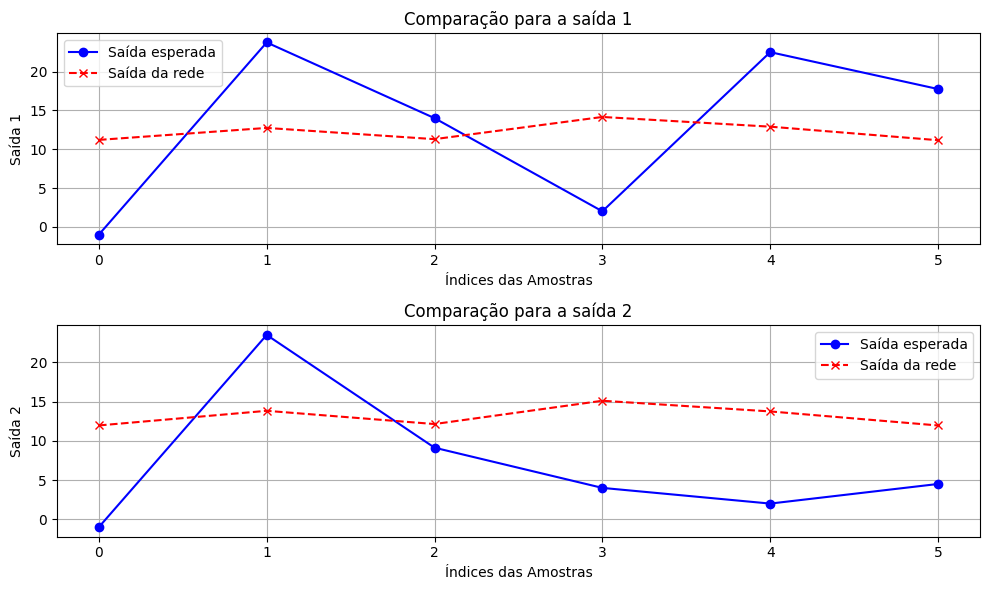

In [69]:
# Criar e configurar o modelo
model = Sequential()
model.add(Input(shape=(X.shape[1],)))# Hidden 1
# model.add(Dense(20, input_dim=X.shape[1], activation='relu'))# Camada oculta com n neurônios
model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(Y.shape[1], activation='linear'))  # Camada de saída com 2 neurônios

# Compilar o modelo
model.compile(optimizer='nadam', loss='mean_squared_error')

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitora a perda no conjunto de validação
    patience=10,         # Número de épocas sem melhora antes de parar
    restore_best_weights=True  # Restaura os pesos da melhor época
)

# Treinar o modelo com Early Stopping
history = model.fit(
    X_train, Y_train,
    epochs=500, 
    verbose=2, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Testar o modelo
Y_pred = model.predict(X_test)

# Avaliar desempenho
mse_error = mean_squared_error(Y_test, Y_pred)
print(f"Erro médio quadrático (MSE) no conjunto de teste: {mse_error:.4f}")

# Plotar resultados
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(Y_test[:, i], 'b-o', label='Saída esperada')
    plt.plot(Y_pred[:, i], 'r--x', label='Saída da rede')
    plt.xlabel('Índices das Amostras')
    plt.ylabel(f'Saída {i+1}')
    plt.legend()
    plt.grid(True)
    plt.title(f'Comparação para a saída {i+1}')
plt.tight_layout()
plt.show()
